# CellChat analysis of Global DCM object

In [1]:
suppressMessages({
    library(plyr)
    library(CellChat)
    library(patchwork)
    library(SeuratDisk)
    library(Seurat)
    library(SingleCellExperiment)
    library(ggalluvial)
    library(repr)
    library(ggplot2)
    library(RColorBrewer)
    library(cluster)
    #library(dendextend)
 })
options(stringsAsFactors = FALSE)

In [2]:
library(ComplexHeatmap)

Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




In [3]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.1 LTS

Matrix products: default
BLAS/LAPACK: /home/jovyan/my-conda-envs/R4.0.5_CellChat/lib/libopenblasp-r0.3.15.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] ComplexHeatmap_2.6.2        cluster_2.1.2              
 [3] RColorBrewer_1.1-2          repr_1.1.3                 
 [5] ggalluvial_0.12.3           SingleCellExperiment_1.12.0
 [7] SummarizedExperiment_1.20.0 GenomicRanges_1.42.0       
 [9] GenomeInfoDb

In [4]:
#options(repr.plot.width = 7, repr.plot.height = 7)
options(repr.plot.width = 12, repr.plot.height = 12)

In [5]:
'%!in%' <- function(x,y)!('%in%'(x,y))

In [6]:
options(future.globals.maxSize = 20000 * 1024 ^ 2)

In [7]:
OUTDIR <- "/home/jovyan/globus/CellChat/ALL_CELLSTATE_V8.1_out/"
dir.create(OUTDIR, showWarnings = FALSE)
setwd(OUTDIR)
getwd()

[1] "/home/jovyan/globus/CellChat/ALL_CELLSTATE_V8.1_out"

In [8]:
INDIR <- "/home/jovyan/globus/CellChat/CellChat_V8.1"

In [9]:
cellchat.PKP2.RV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_PKP2_RV_CELLSTATES.rds"))

In [10]:
cellchat.TTN.RV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_TTN_RV_CELLSTATES.rds"))

In [11]:
cellchat.RBM20.RV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_RBM20_RV_CELLSTATES.rds"))

In [12]:
cellchat.LMNA.RV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_LMNA_RV_CELLSTATES.rds"))

In [13]:
cellchat.PVneg.RV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_PVneg_RV_CELLSTATES.rds"))

In [14]:
cellchat.control.RV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_control_RV_CELLSTATES.rds"))

In [15]:
cellchat.PKP2.LV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_PKP2_LV_CELLSTATES.rds"))

In [16]:
cellchat.TTN.LV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_TTN_LV_CELLSTATES.rds"))

In [17]:
cellchat.RBM20.LV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_RBM20_LV_CELLSTATES.rds"))

In [18]:
cellchat.LMNA.LV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_LMNA_LV_CELLSTATES.rds"))

In [19]:
cellchat.PVneg.LV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_PVneg_LV_CELLSTATES.rds"))

In [20]:
cellchat.control.LV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_control_LV_CELLSTATES.rds"))

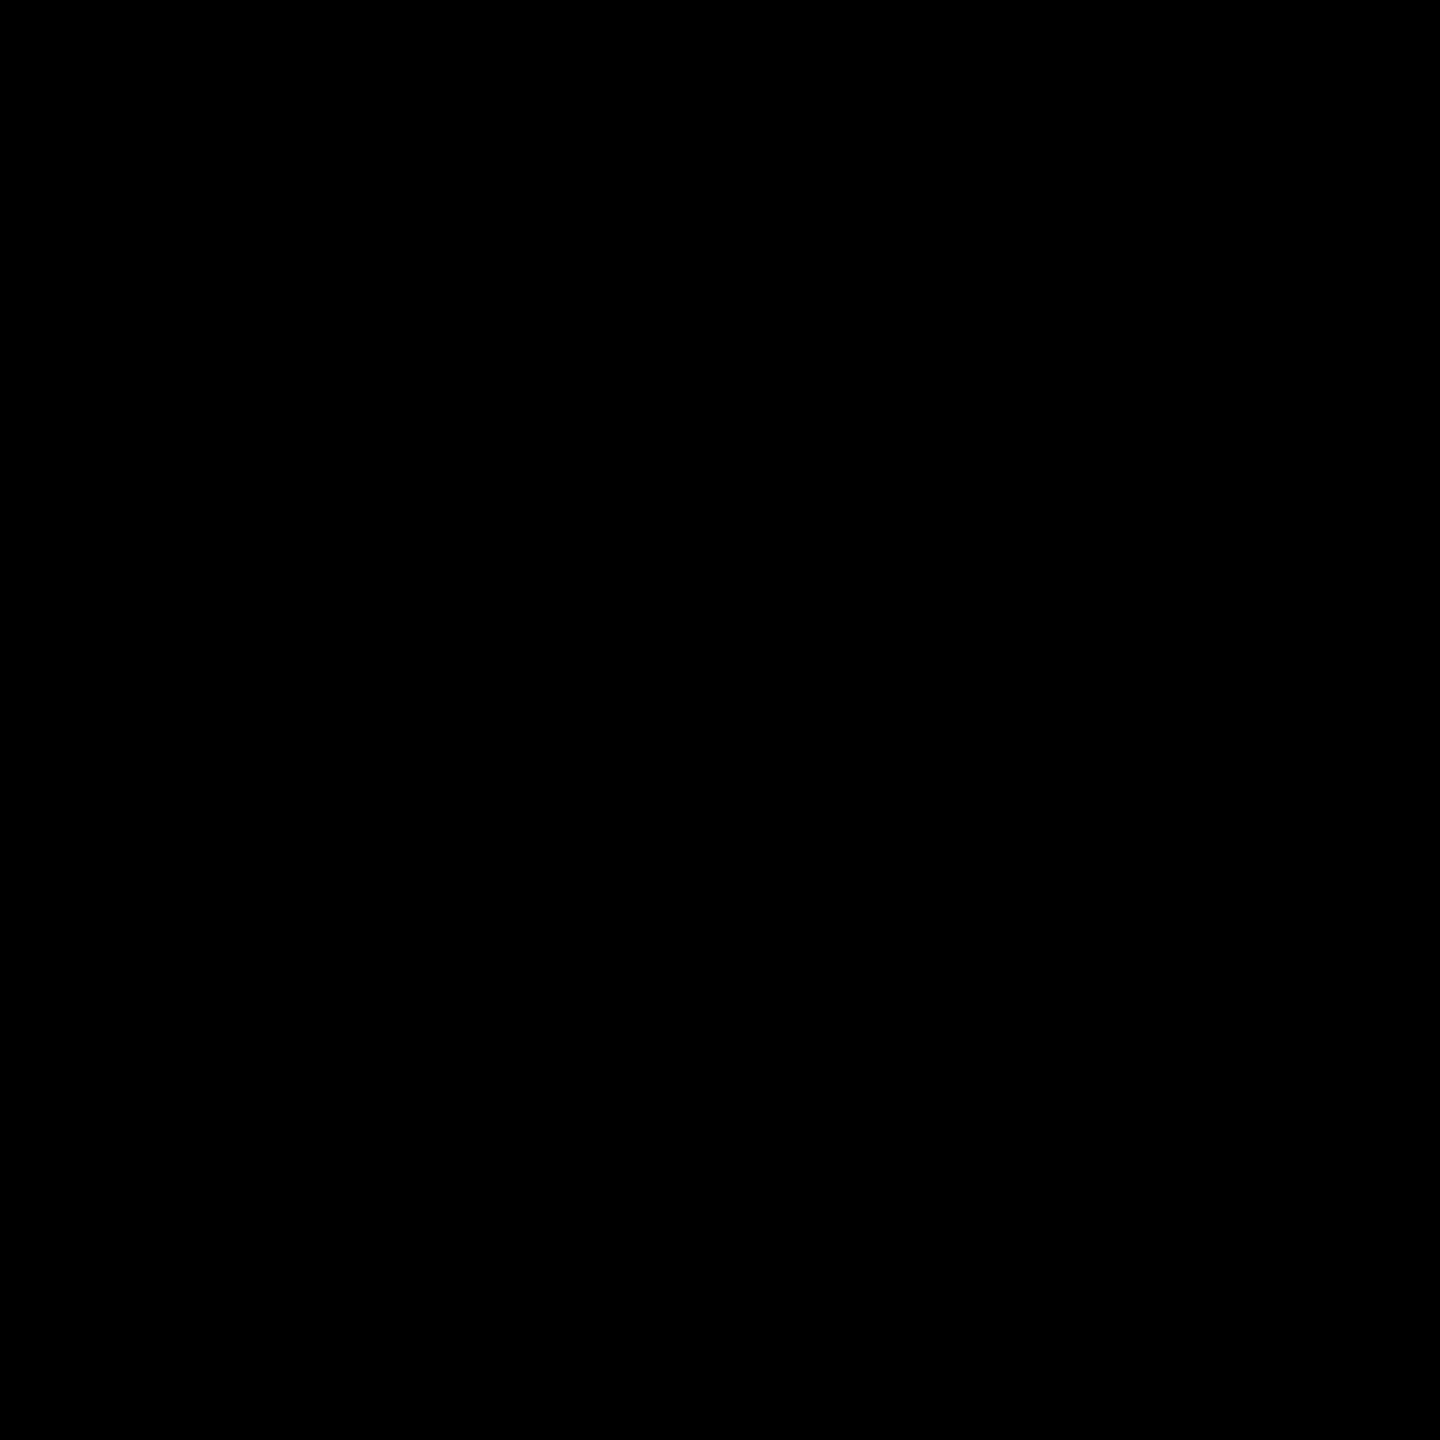

In [21]:
pathways.show <- "IGF"
pdf(file= paste('TEMP_-_', pathways.show, '_LV.pdf', sep=''), width = 12, height = 12)

netVisual_aggregate(cellchat.LMNA.LV, layout = 'chord', 
                    signaling = pathways.show, 
                    signaling.name = paste(pathways.show, 'LMNA_LV'),
                    #group = group.cellType3, 
                    big.gap = 2.5, small.gap = 0.5,
                    edge.width.max = 10,
                    vertex.label.cex = 1.8,
                    mar = c(5, 5, 5, 5)
                   )
graphics.off()

In [22]:
print(length(levels(cellchat.control.RV@idents)))
print(length(levels(cellchat.LMNA.RV@idents)))
print(length(levels(cellchat.PKP2.RV@idents)))
print(length(levels(cellchat.TTN.RV@idents)))
print(length(levels(cellchat.RBM20.RV@idents)))
print(length(levels(cellchat.PVneg.RV@idents)))
print(length(levels(cellchat.control.LV@idents)))
print(length(levels(cellchat.LMNA.LV@idents)))
print(length(levels(cellchat.PKP2.LV@idents)))
print(length(levels(cellchat.TTN.LV@idents)))
print(length(levels(cellchat.RBM20.LV@idents)))
print(length(levels(cellchat.PVneg.LV@idents)))

[1] 70
[1] 70
[1] 69
[1] 70
[1] 70
[1] 70
[1] 71
[1] 70
[1] 70
[1] 70
[1] 70
[1] 70


In [23]:
# Define the cell labels to lift up
group.new = levels(cellchat.control.LV@idents)
#group.new = sort(union(levels(cellchat.control.RV@idents), levels(cellchat.PKP2.RV@idents)))
cellchat.control.RV.2 <- liftCellChat(cellchat.control.RV, group.new)
cellchat.PKP2.RV.2 <- liftCellChat(cellchat.PKP2.RV, group.new)
cellchat.TTN.RV.2 <- liftCellChat(cellchat.TTN.RV, group.new)
cellchat.RBM20.RV.2 <- liftCellChat(cellchat.RBM20.RV, group.new)
cellchat.LMNA.RV.2 <- liftCellChat(cellchat.LMNA.RV, group.new)
cellchat.PVneg.RV.2 <- liftCellChat(cellchat.PVneg.RV, group.new)

cellchat.control.LV.2 <- liftCellChat(cellchat.control.LV, group.new)
cellchat.PKP2.LV.2 <- liftCellChat(cellchat.PKP2.LV, group.new)
cellchat.TTN.LV.2 <- liftCellChat(cellchat.TTN.LV, group.new)
cellchat.RBM20.LV.2 <- liftCellChat(cellchat.RBM20.LV, group.new)
cellchat.LMNA.LV.2 <- liftCellChat(cellchat.LMNA.LV, group.new)
cellchat.PVneg.LV.2 <- liftCellChat(cellchat.PVneg.LV, group.new)

The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


In [24]:
rm(list = c('cellchat.control.RV','cellchat.PKP2.RV','cellchat.TTN.RV', 'cellchat.RBM20.RV', 'cellchat.LMNA.RV','cellchat.PVneg.RV','cellchat.control.LV','cellchat.PKP2.LV','cellchat.TTN.LV','cellchat.RBM20.LV','cellchat.LMNA.LV','cellchat.PVneg.LV'))

In [25]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,8184798,437.2,13087605,699.0,13087605,699.0
Vcells,2615015176,19951.0,4089879293,31203.4,2829857741,21590.2


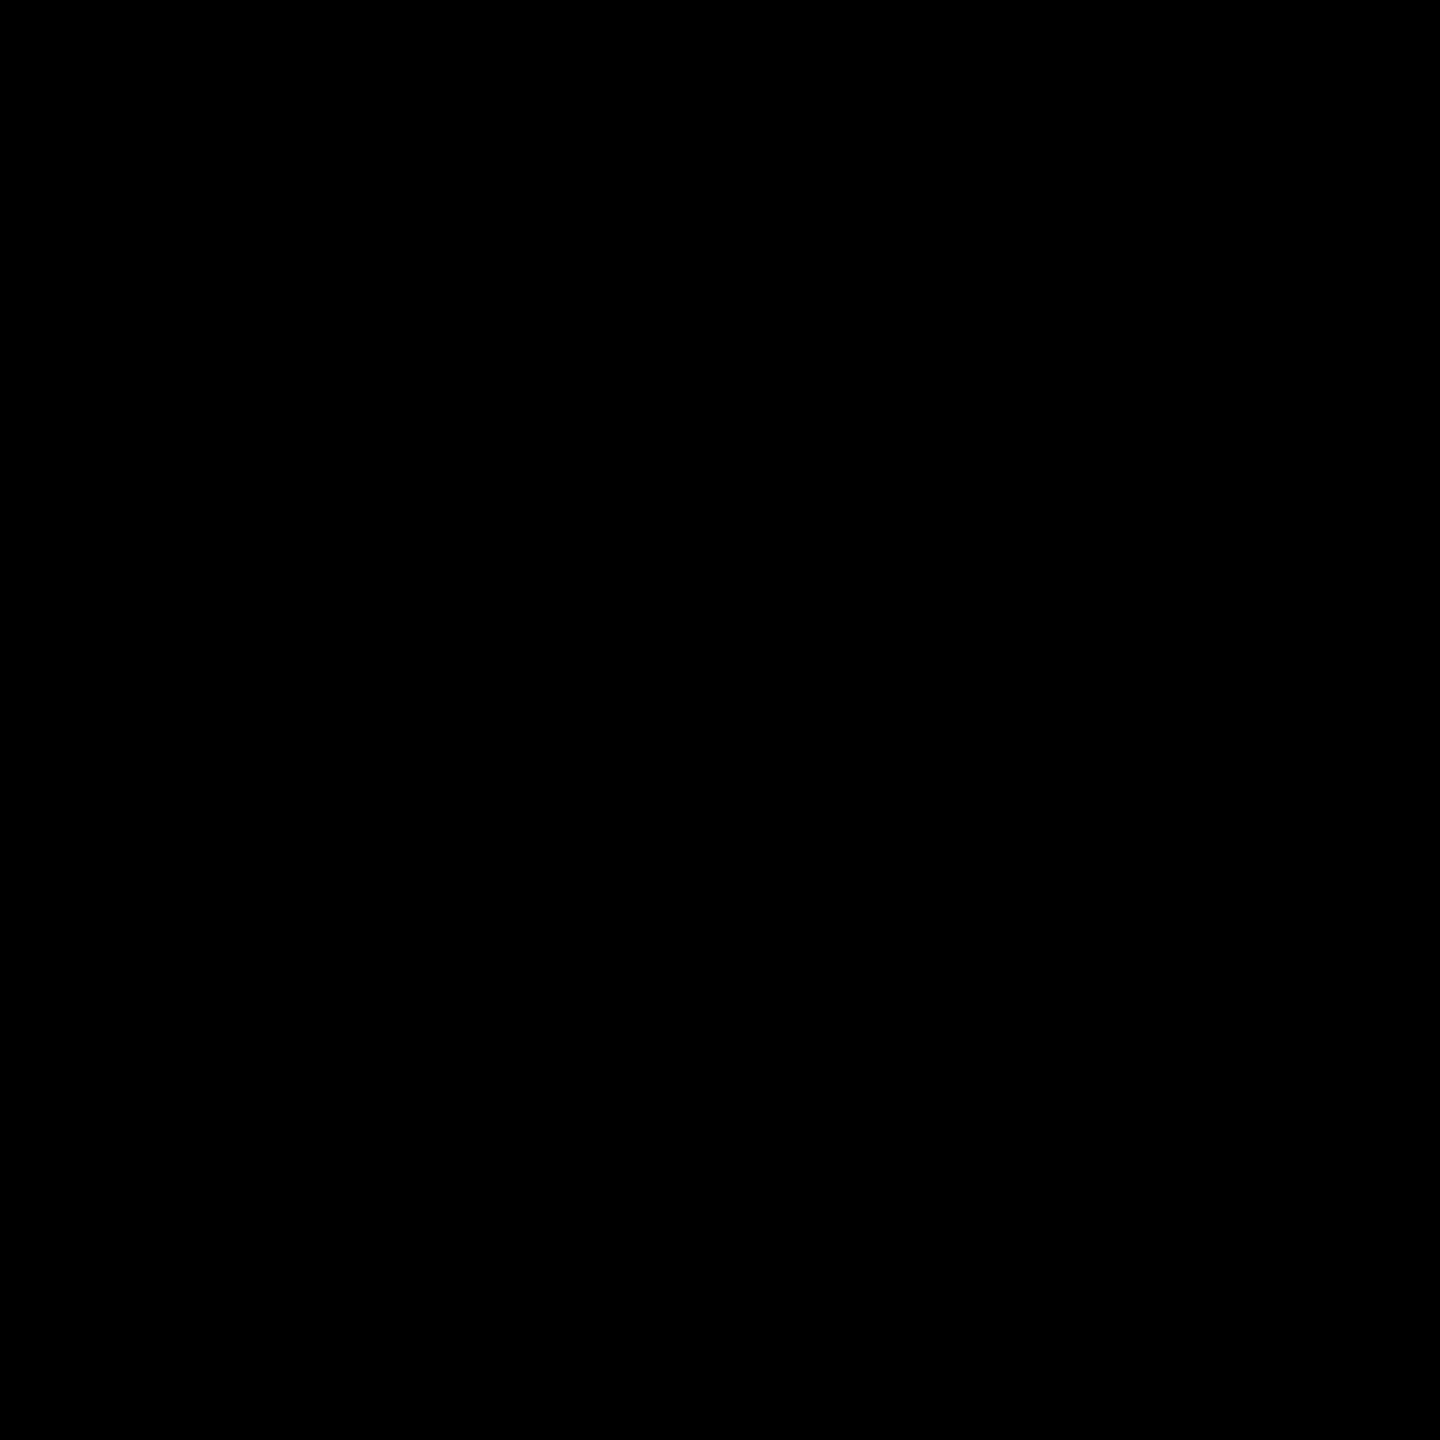

In [26]:
pathways.show <- "IGF"
pdf(file= paste('TEMP2_-_', pathways.show, '_LV.pdf', sep=''), width = 12, height = 12)

netVisual_aggregate(cellchat.LMNA.LV.2, layout = 'chord', 
                    signaling = pathways.show, 
                    signaling.name = paste(pathways.show, 'LMNA_LV'),
                    #group = group.cellType3, 
                    big.gap = 2.5, small.gap = 0.5,
                    edge.width.max = 10,
                    vertex.label.cex = 1.8,
                    mar = c(5, 5, 5, 5)
                   )
graphics.off()

In [27]:
object.list <- list(control.RV = cellchat.control.RV.2
                  , LMNA.RV = cellchat.LMNA.RV.2
                  , TTN.RV = cellchat.TTN.RV.2
                  , RBM20.RV = cellchat.RBM20.RV.2
                  , PKP2.RV = cellchat.PKP2.RV.2
                  , PVneg.RV = cellchat.PVneg.RV.2
                  , control.LV = cellchat.control.LV.2
                  , LMNA.LV = cellchat.LMNA.LV.2
                  , TTN.LV = cellchat.TTN.LV.2
                  , RBM20.LV = cellchat.RBM20.LV.2
                  , PKP2.LV = cellchat.PKP2.LV.2
                  , PVneg.LV = cellchat.PVneg.LV.2
                   )

In [28]:
#CELLSTATE_CELLTYPE_map <- distinct(rbind(cellchat.control.RV.2@meta[c('cell_states','cell_type')],cellchat.PKP2.RV.2@meta[c('cell_states','cell_type')]))
CELLSTATE_CELLTYPE_map <- distinct(cellchat.control.LV.2@meta[c('cell_states','cell_type')])
CELLSTATE_CELLTYPE_map <- data.frame(lapply(CELLSTATE_CELLTYPE_map, as.character), stringsAsFactors=FALSE)
head(CELLSTATE_CELLTYPE_map)

,cell_states,cell_type
,<chr>,<chr>
1,SMC1.2,Mural
2,vCM1.0,CM
3,vCM2,CM
4,EC8.0,EC
5,PC1,Mural
6,vCM3.0,CM


In [29]:
CELLTYPE.ORDER <- c('CM','Mural','FB','EC','Myeloid','Lymphoid','NC','Mast','AD')
CELLTYPE.PLOT.ORDER <- c(CELLTYPE.ORDER[5:length(CELLTYPE.ORDER)],CELLTYPE.ORDER[1:4]) 
CELLTYPE.PLOT.ORDER

[1] "Myeloid"  "Lymphoid" "NC"       "Mast"     "AD"       "CM"       "Mural"   
[8] "FB"       "EC"

In [30]:
group.CELLTYPE <- mapvalues(group.new, from=CELLSTATE_CELLTYPE_map$cell_states, to=CELLSTATE_CELLTYPE_map$cell_type)
group.CELLTYPE <- factor(group.CELLTYPE)
group.CELLTYPE <- factor(group.CELLTYPE, levels = CELLTYPE.PLOT.ORDER)

In [31]:
cellstate.order <- order(CELLSTATE_CELLTYPE_map$cell_type, gsub("^([^\\.0-9]{2,3}?)[\\.0-9]+.*?$", "\\1", CELLSTATE_CELLTYPE_map$cell_states), as.numeric(gsub("^[^\\.0-9]{2,3}([\\.0-9]+).*?$", "\\1", CELLSTATE_CELLTYPE_map$cell_states)))
group.cellType <- CELLSTATE_CELLTYPE_map$cell_type
names(group.cellType) <- CELLSTATE_CELLTYPE_map$cell_states
group.cellType2 <- group.cellType[cellstate.order]

group.cellType3 <- factor(group.cellType2, levels = CELLTYPE.PLOT.ORDER)
group.cellType3 <- group.cellType3[order(group.cellType3)]

Warning message in eval(quote(list(...)), env):
“NAs introduced by coercion”


## Make Cellstate pathway specific Chord graphs

In [32]:
names(object.list)

[1] "control.RV" "LMNA.RV"    "TTN.RV"     "RBM20.RV"   "PKP2.RV"   
 [6] "PVneg.RV"   "control.LV" "LMNA.LV"    "TTN.LV"     "RBM20.LV"  
[11] "PKP2.LV"    "PVneg.LV"

## LV

In [33]:
pathways.show <- 'IGF'

pdf(file= paste('netVisual_aggregate_chord_plot_-_', pathways.show, '_LV.pdf', sep=''), width = 12, height = 12)

for (i in c(7:12)){
    netVisual_aggregate(object.list[[i]], layout = 'chord', 
                    signaling = pathways.show, 
                    signaling.name = paste(pathways.show, names(object.list)[[i]]),
                    group = group.cellType3, 
                    big.gap = 2.5, small.gap = 0.5,
                    edge.width.max = 10,
                    vertex.label.cex = 1.8,
                    mar = c(5, 5, 5, 5)
                   )
}

graphics.off()


In [34]:
pathways.show <- 'BMP'

pdf(file= paste('netVisual_aggregate_chord_plot_-_', pathways.show, '_LV.pdf', sep=''), width = 12, height = 12)

for (i in c(7:12)){
    netVisual_aggregate(object.list[[i]], layout = 'chord', 
                    signaling = pathways.show, 
                    signaling.name = paste(pathways.show, names(object.list)[[i]]),
                    group = group.cellType3, 
                    big.gap = 2.5, small.gap = 0.5,
                    edge.width.max = 10,
                    vertex.label.cex = 1.8,
                    mar = c(5, 5, 5, 5)
                   )
}

graphics.off()


In [35]:
pathways.show <- 'PERIOSTIN'

pdf(file= paste('netVisual_aggregate_chord_plot_-_', pathways.show, '_LV.pdf', sep=''), width = 12, height = 12)

for (i in c(7:12)){
    netVisual_aggregate(object.list[[i]], layout = 'chord', 
                    signaling = pathways.show, 
                    signaling.name = paste(pathways.show, names(object.list)[[i]]),
                    group = group.cellType3, 
                    big.gap = 2.5, small.gap = 0.5,
                    edge.width.max = 10,
                    vertex.label.cex = 1.8,
                    mar = c(5, 5, 5, 5)
                   )
}

graphics.off()


In [36]:
pathways.show <- 'NRG'

pdf(file= paste('netVisual_aggregate_chord_plot_-_', pathways.show, '_LV.pdf', sep=''), width = 12, height = 12)

for (i in c(7:12)){
    netVisual_aggregate(object.list[[i]], layout = 'chord', 
                    signaling = pathways.show, 
                    signaling.name = paste(pathways.show, names(object.list)[[i]]),
                    group = group.cellType3, 
                    big.gap = 2.5, small.gap = 0.5,
                    edge.width.max = 10,
                    vertex.label.cex = 1.8,
                    mar = c(5, 5, 5, 5)
                   )
}
graphics.off()


In [37]:
pathways.show <- 'EDN'

pdf(file= paste('netVisual_aggregate_chord_plot_-_', pathways.show, '_LV.pdf', sep=''), width = 12, height = 12)

for (i in c(8:8)){
    netVisual_aggregate(object.list[[i]], layout = 'chord', 
                    signaling = pathways.show, 
                    signaling.name = paste(pathways.show, names(object.list)[[i]]),
                    group = group.cellType3, 
                    big.gap = 2.5, small.gap = 0.5,
                    edge.width.max = 10,
                    vertex.label.cex = 1.8,
                    mar = c(5, 5, 5, 5)
                   )
}

graphics.off()


In [38]:
pathways.show <- 'PROS'

pdf(file= paste('netVisual_aggregate_chord_plot_-_', pathways.show, '_LV.pdf', sep=''), width = 12, height = 12)

for (i in c(8:12)){
    netVisual_aggregate(object.list[[i]], layout = 'chord', 
                    signaling = pathways.show, 
                    signaling.name = paste(pathways.show, names(object.list)[[i]]),
                    group = group.cellType3, 
                    big.gap = 2.5, small.gap = 0.5,
                    edge.width.max = 10,
                    vertex.label.cex = 1.8,
                    mar = c(5, 5, 5, 5)
                   )
}
graphics.off()


In [39]:
pathways.show <- 'ITGB2'

pdf(file= paste('netVisual_aggregate_chord_plot_-_', pathways.show, '_LV.pdf', sep=''), width = 12, height = 12)

for (i in c(8:12)){
    netVisual_aggregate(object.list[[i]], layout = 'chord', 
                    signaling = pathways.show, 
                    signaling.name = paste(pathways.show, names(object.list)[[i]]),
                    group = group.cellType3, 
                    big.gap = 2.5, small.gap = 0.5,
                    edge.width.max = 10,
                    vertex.label.cex = 1.8,
                    mar = c(5, 5, 5, 5)
                   )
}
graphics.off()


## RV

In [40]:
pathways.show <- 'IGF'

pdf(file= paste('netVisual_aggregate_chord_plot_-_', pathways.show, '_RV.pdf', sep=''), width = 12, height = 12)

for (i in c(1:6)){
    netVisual_aggregate(object.list[[i]], layout = 'chord', 
                    signaling = pathways.show, 
                    signaling.name = paste(pathways.show, names(object.list)[[i]]),
                    group = group.cellType3, 
                    big.gap = 2.5, small.gap = 0.5,
                    edge.width.max = 10,
                    vertex.label.cex = 1.8,
                    mar = c(5, 5, 5, 5)
                   )
}

graphics.off()


In [41]:
pathways.show <- 'BMP'

pdf(file= paste('netVisual_aggregate_chord_plot_-_', pathways.show, '_RV.pdf', sep=''), width = 12, height = 12)

for (i in c(1:6)){
    netVisual_aggregate(object.list[[i]], layout = 'chord', 
                    signaling = pathways.show, 
                    signaling.name = paste(pathways.show, names(object.list)[[i]]),
                    group = group.cellType3, 
                    big.gap = 2.5, small.gap = 0.5,
                    edge.width.max = 10,
                    vertex.label.cex = 1.8,
                    mar = c(5, 5, 5, 5)
                   )
}

graphics.off()


In [42]:
pathways.show <- 'PERIOSTIN'

pdf(file= paste('netVisual_aggregate_chord_plot_-_', pathways.show, '_RV.pdf', sep=''), width = 12, height = 12)

for (i in c(1:6)){
    netVisual_aggregate(object.list[[i]], layout = 'chord', 
                    signaling = pathways.show, 
                    signaling.name = paste(pathways.show, names(object.list)[[i]]),
                    group = group.cellType3, 
                    big.gap = 2.5, small.gap = 0.5,
                    edge.width.max = 10,
                    vertex.label.cex = 1.8,
                    mar = c(5, 5, 5, 5)
                   )
}

graphics.off()


In [43]:
pathways.show <- 'NRG'

pdf(file= paste('netVisual_aggregate_chord_plot_-_', pathways.show, '_RV.pdf', sep=''), width = 12, height = 12)

for (i in c(1:6)){
    netVisual_aggregate(object.list[[i]], layout = 'chord', 
                    signaling = pathways.show, 
                    signaling.name = paste(pathways.show, names(object.list)[[i]]),
                    group = group.cellType3, 
                    big.gap = 2.5, small.gap = 0.5,
                    edge.width.max = 10,
                    vertex.label.cex = 1.8,
                    mar = c(5, 5, 5, 5)
                   )
}

graphics.off()


In [44]:
pathways.show <- 'EDN'

pdf(file= paste('netVisual_aggregate_chord_plot_-_', pathways.show, '_RV.pdf', sep=''), width = 12, height = 12)

for (i in c(5:5)){
    netVisual_aggregate(object.list[[i]], layout = 'chord', 
                    signaling = pathways.show, 
                    signaling.name = paste(pathways.show, names(object.list)[[i]]),
                    group = group.cellType3, 
                    big.gap = 2.5, small.gap = 0.5,
                    edge.width.max = 10,
                    vertex.label.cex = 1.8,
                    mar = c(5, 5, 5, 5)
                   )
}

graphics.off()
